# Analysing A/B test results, business decision-making

This project is conducted with the marketing department of a large online shop.  

**Project Purpose:**  
The shop wants to increase the revenue, for a clear strategy a research is required.  
  
The research will involve the following steps:  
- prioritisation of hypotheses,  
- running an A/B test,
- analysing the results of the test.  
  
**Description of data:**  
Hypothesis.csv file  
Hypothesis - a brief description of the hypothesis;  
Reach - user reach on a 10-point scale;  
Impact - impact on users on a 10-point scale;  
Confidence - confidence in the hypothesis on a 10-point scale;  
Efforts - resource costs for hypothesis testing on a 10-point scale (the higher the Efforts value, the more expensive the hypothesis testing).  
  
Orders.csv file  
transactionId - order identifier;  
visitorId - identifier of the user who made the order;  
date - date when the order was made;  
revenue - revenue from the order;  
group - A/B-test group the order fell into.    
  
The visitors.csv file  
date - date;  
group - A/B-test group;  
visitors - number of users in the specified date in the specified A/B-test group.

## Hypotheses prioritisation 

In [1]:
# libraries import
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [53]:
# widening the notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# returning full TOC
display(HTML("<style>#toc-wrapper{ position: relative; width: 20%; top: 130px; left: 0px; }</style>"))

In [4]:
# plot size setting
plt.rcParams["figure.figsize"] = (15,10)

### Files upload

In [5]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', encoding='utf-8')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', parse_dates=['date'])
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', parse_dates=['date'])

#### Data check

In [6]:
# text wide column size setting
pd.options.display.max_colwidth = 150
# displaying df
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


We have a file with nine hypotheses with parameters:  
**R** - Reach,  
**I** - Impact,  
**C** -Confidence,  
**E** - Efforts.  
  
All data are given with a 10-point scale.

#### Let's apply the ICE framework to prioritise hypotheses:

In [7]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


According to the ICE indicator, using the 3 available criteria, we can highlight 3 hypotheses: 8, 0, 7.

#### Consider the RICE indicator for each hypothesis:

In [8]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])
hypothesis['RICE'] = hypothesis['RICE'].round(2)
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Considering 4 criteria, hypotheses 7, 2, 0, 6 stand out for this indicator.

### Analysis of the change in prioritisation, when RICE is applied instead of ICE:

This analysis takes into account the rules of mathematical division and multiplication.
When calculating ICE, the hypotheses with maximum I and C scores, and average E scores, came out in the lead.
Adding the R score, the 7th hypothesis came to the lead with maximum R, the 8th hypothesis slipped lower with minimum R, the 2nd showed a good RICE score with decent R, the 0 and 6 hypotheses shared the 3rd place with average R and good combinations of I, C and E.

**Summary:**  
Hypothesis testing often requires large investments (financial and resource). To maximise the result at minimum cost, hypothesis prioritisation is carried out. Having conducted popular methods of task prioritisation using ICE and RICE methods, we found that hypotheses 0 and 7 are leading in both methods. Also, hypothesis 8 is additionally prioritised in ICE, and hypotheses 2 and 6 in RICE.

## Analizing the A/B test results

### Files `orders` и `visitors` store the results of the tests performed, let's take a look at the data:

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Let's check the groups quantity:

In [13]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

The file has two groups data as expected

#### Let's check the quantity of buyers in each group:

In [14]:
ordersGrouped = orders.groupby('visitorId').apply(lambda x: x)
ordersGroupedA = ordersGrouped[ordersGrouped['group'] == 'A']['visitorId']
print('В группе А ' + str(len(ordersGroupedA)) + ' покупателей.')

ordersGroupedB = ordersGrouped[ordersGrouped['group'] == 'B']['visitorId']
print('В группе B ' + str(len(ordersGroupedB)) + ' покупателей.')

В группе А 557 покупателей.
В группе B 640 покупателей.


#### Let's check the periiod of the tests:

In [15]:
display(min(orders['date']))
display(max(orders['date']))

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

We have data for August 2019.

**Let's make sure the data doesn't have blanks:**

In [16]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

No blanks

**Checking duplicates:**

In [18]:
orders.value_counts(orders.duplicated())

False    1197
Name: count, dtype: int64

In [19]:
visitors.value_counts(visitors.duplicated())

False    62
Name: count, dtype: int64

**Let's check the intersection of the participants in two groups:**

In [20]:
buyers = orders.query('revenue > 0')
buyers = buyers[buyers.groupby('visitorId')['group'].transform('nunique') == buyers['group'].nunique()]
buyersAB = buyers[['visitorId', 'group']]
buyersAB = buyersAB[['visitorId', 'group']].groupby('visitorId').agg({'group': lambda x: list(x)})
display(buyersAB.head())
buyersAB.count()

,group
visitorId,
8300375,"[B, A]"
199603092,"[A, A, B, A, A]"
232979603,"[B, A]"
237748145,"[B, A, A, A, A]"
276558944,"[B, A]"


group    58
dtype: int64

We see that 58 customers are in both groups at the same time. It is definitely not possible to move users between groups, as we will create an imbalance between the groups. Deleting them is not that bad, but the conversion rate will not be quite correct; if we keep them, it will also be not very correct, but less, so let's keep them.

#### Let's create an array of unique pairs of date and test group values:

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


#### Let's collect the aggregated values:

##### Let's calculate the maximum date, the "maximum" group (so that the column is not missing from the output), the number of unique order id and unique user id, the sum of average cheques. Then sort by date and group.

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


##### In the same way we will get the aggregated data about visitors accumulated by day:

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


#### Merging tables:

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
#cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Let's plot the cumulative revenue by group:

In [25]:
# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]
cumulativeRevenueA.head()


,date,revenue,transactionId
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [26]:
# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]
cumulativeRevenueB.head()

,date,revenue,transactionId
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


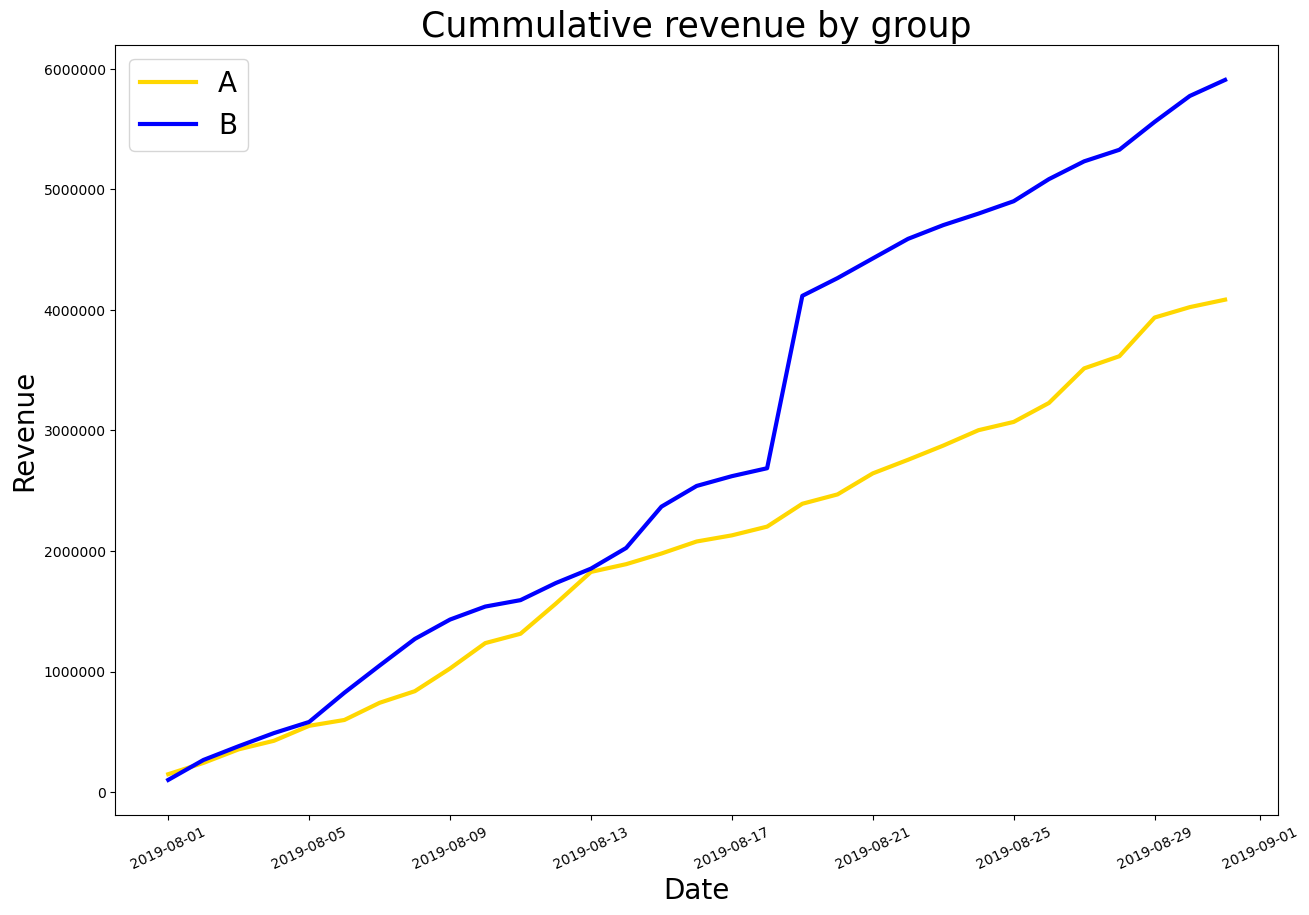

In [27]:
plt.ticklabel_format(style='plain')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', linewidth=3, color='gold')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', linewidth=3, color='blue')

plt.xticks(rotation=25)

plt.title('Cummulative revenue by group', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Revenue', fontsize=20)

plt.legend(fontsize=20);

**Summary:**  
In the first days of the test, the revenue was almost the same in both groups, then the revenue of group B started to grow. The revenue of both groups once again became equal, but later the revenue of group B started growing better again. There is also a sharp increase in group B in the middle of the test, which indicates that there is an outlier in this group in the study period, due to which the revenue of group B is much higher in the end. This is probably the emergence of some new successful high demand product.

### Let's plot the cumulative average receipt by group:

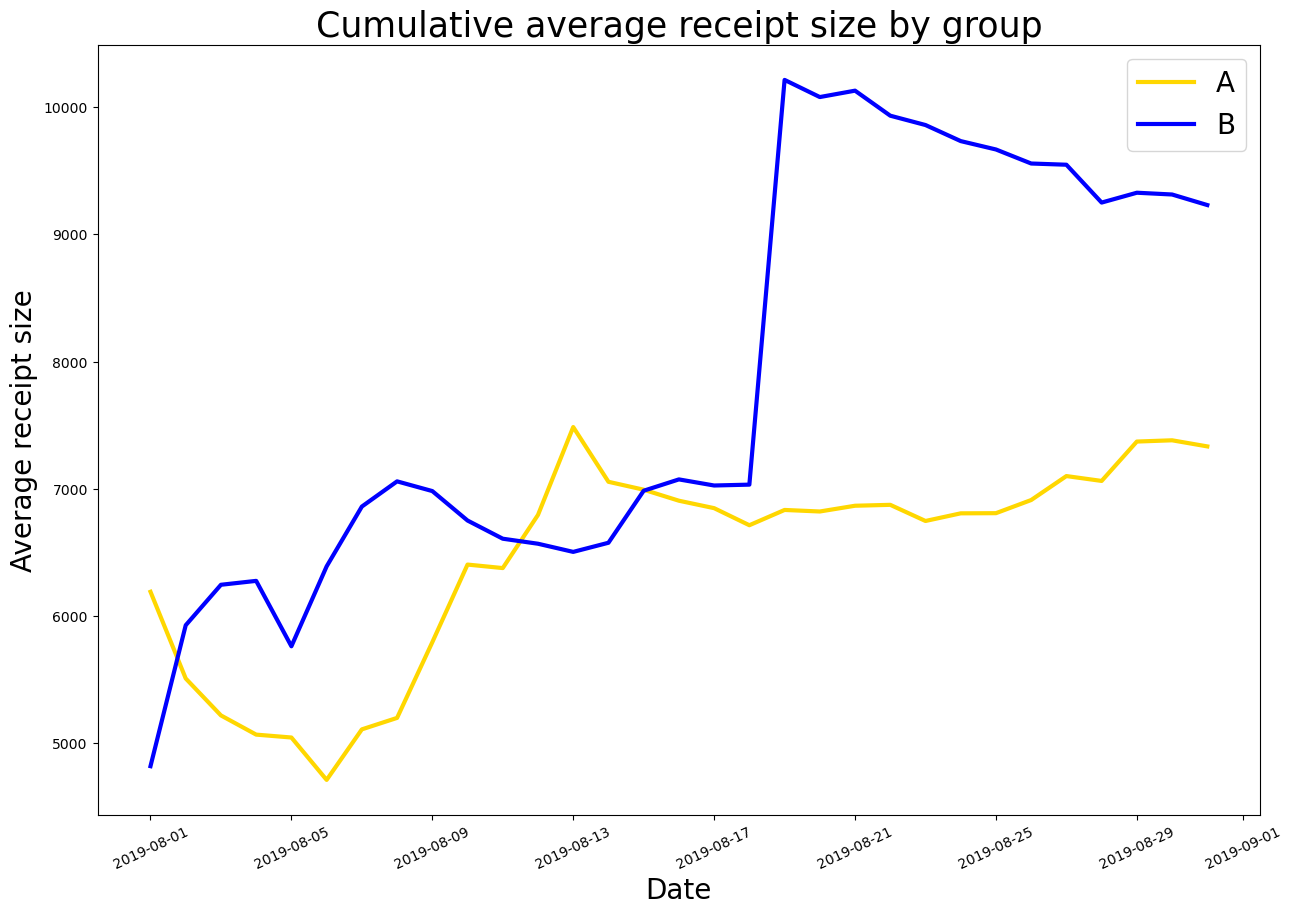

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A', linewidth=3, color='gold')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B', linewidth=3, color='blue')

plt.xticks(rotation=25)

plt.title('Cumulative average receipt size by group', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average receipt size', fontsize=20)

plt.legend(fontsize=20);

**Summary:**  
The dynamics of the average receipt are very diverse, with more obvious outliers appearing at the beginning of the test. In general, we can conclude that group B receipts were greater during the test, but we also see an outlier at the same point in time as the outlier on revenue. There is no sharp decline back, i.e. the outlier is not a one-day thing, perhaps some new high-priced product appeared, which had a success but then the interest slightly decreased.

### Let's plot the relative change in the cumulative average receipt of group B to group A:

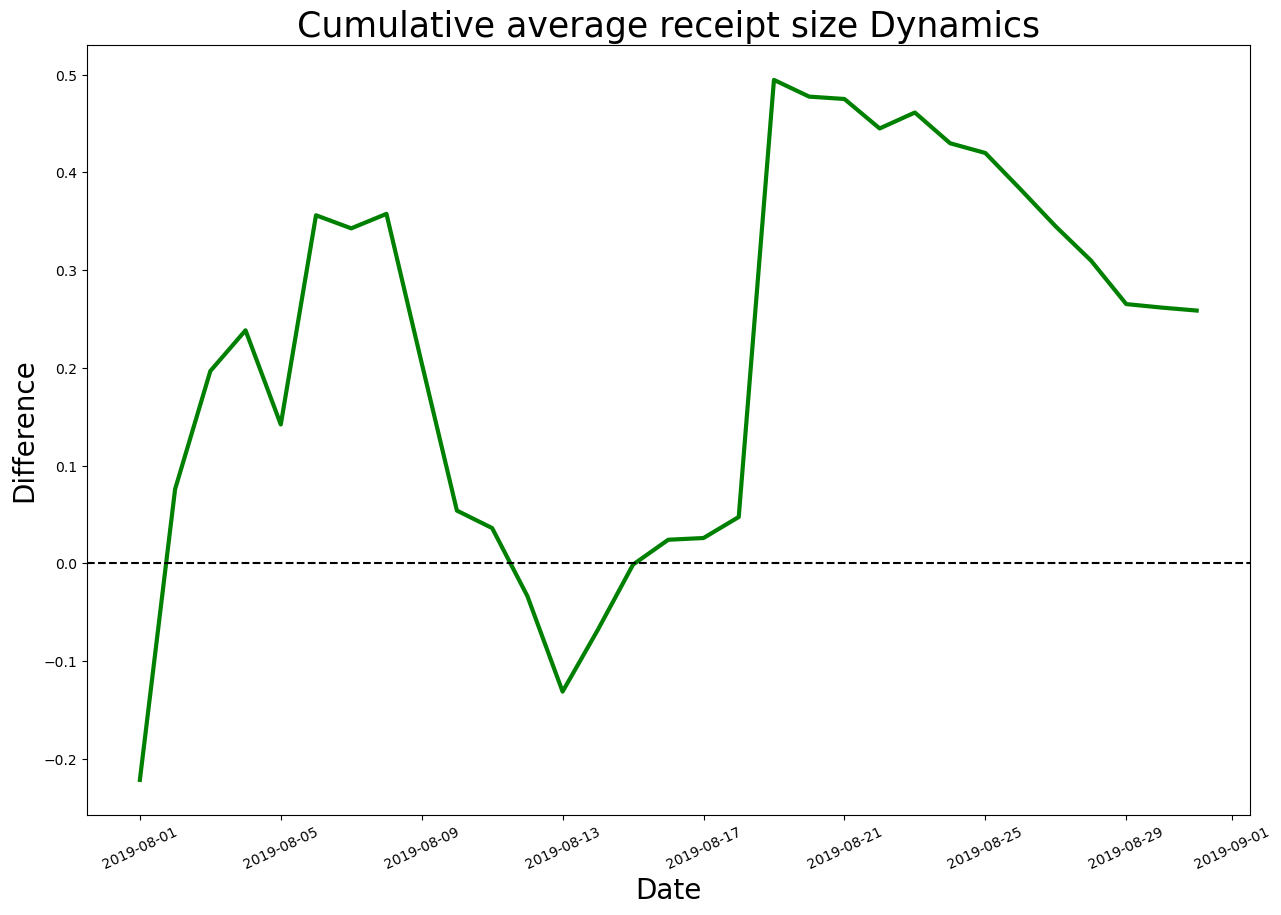

In [29]:
# collect data in one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot the ratio of average receipts
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1, linewidth=3, color='green')

# add the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Cumulative average receipt size Dynamics', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference', fontsize=20)

plt.xticks(rotation=25);


**Summary:**  
Our guess about outliers is confirmed, we see fluctuations relative to 0 at the beginning of the test and in the middle to the end of the test.

### Let's plot the cumulative average number of orders per visitor by group:

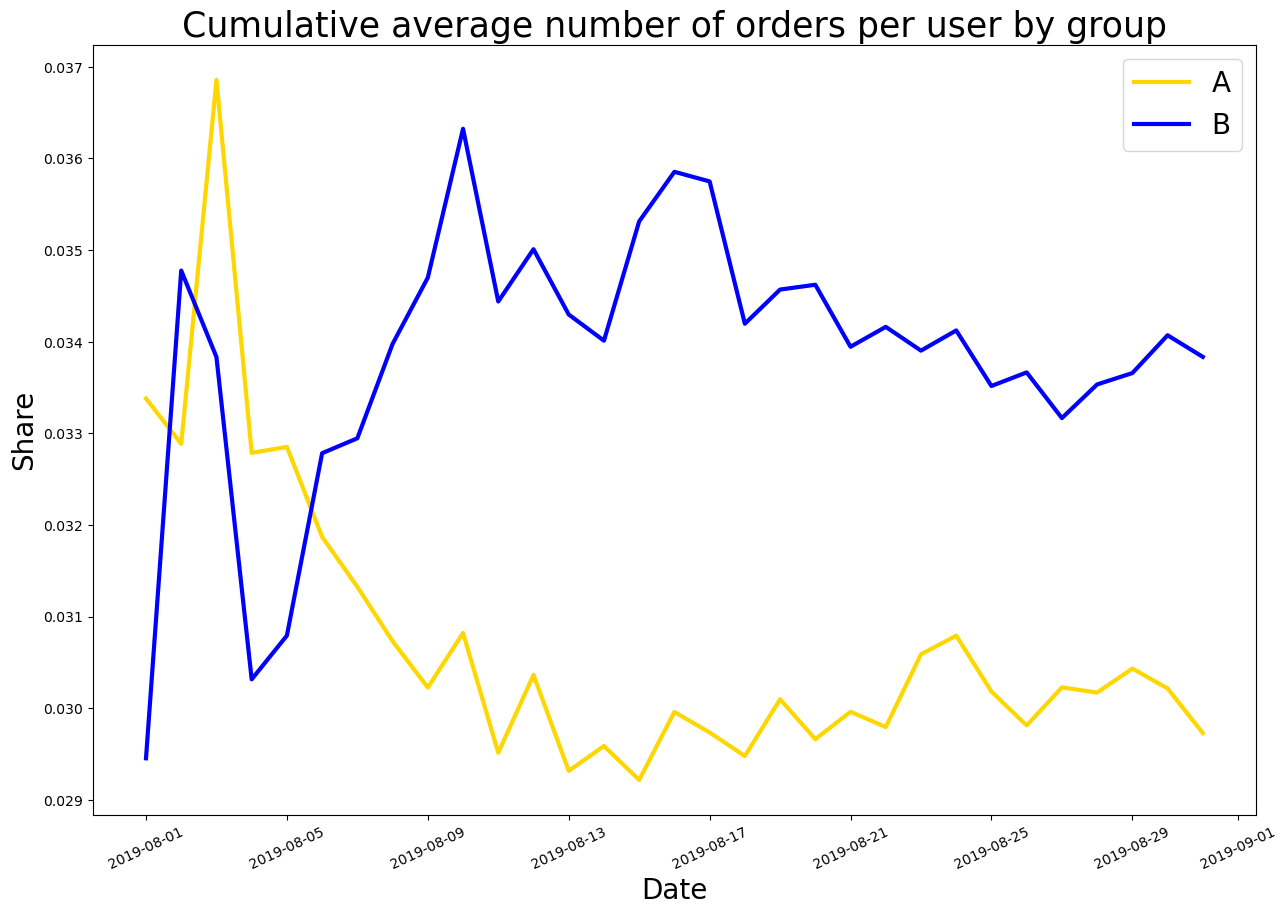

In [30]:
# calculate the cumulative average of orders per visitor
cumulativeData['ordersAvg'] = cumulativeData['transactionId']/cumulativeData['visitors']

# separate group A data
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# separate group B data
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plot the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['ordersAvg'], label='A', linewidth=3, color='gold')
plt.plot(cumulativeDataB['date'], cumulativeDataB['ordersAvg'], label='B', linewidth=3, color='blue')

plt.title('Cumulative average number of orders per user by group', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Share', fontsize=20)

plt.xticks(rotation=25)
plt.legend(fontsize=20);

# set the scale of axes
#plt.axis(["2019-09-01", '2019-08-01', 0, 0.015]);


**Summary:**  
Group A was leading by average number of orders at first, we remember that they had higher revenue and average receipt at the beginning of the test, but soon the accumulated average of orders of group B overtook group A and stayed in the lead until the end.

### Let's plot the relative change in the cumulative average number of orders per visitor from group B to group A:

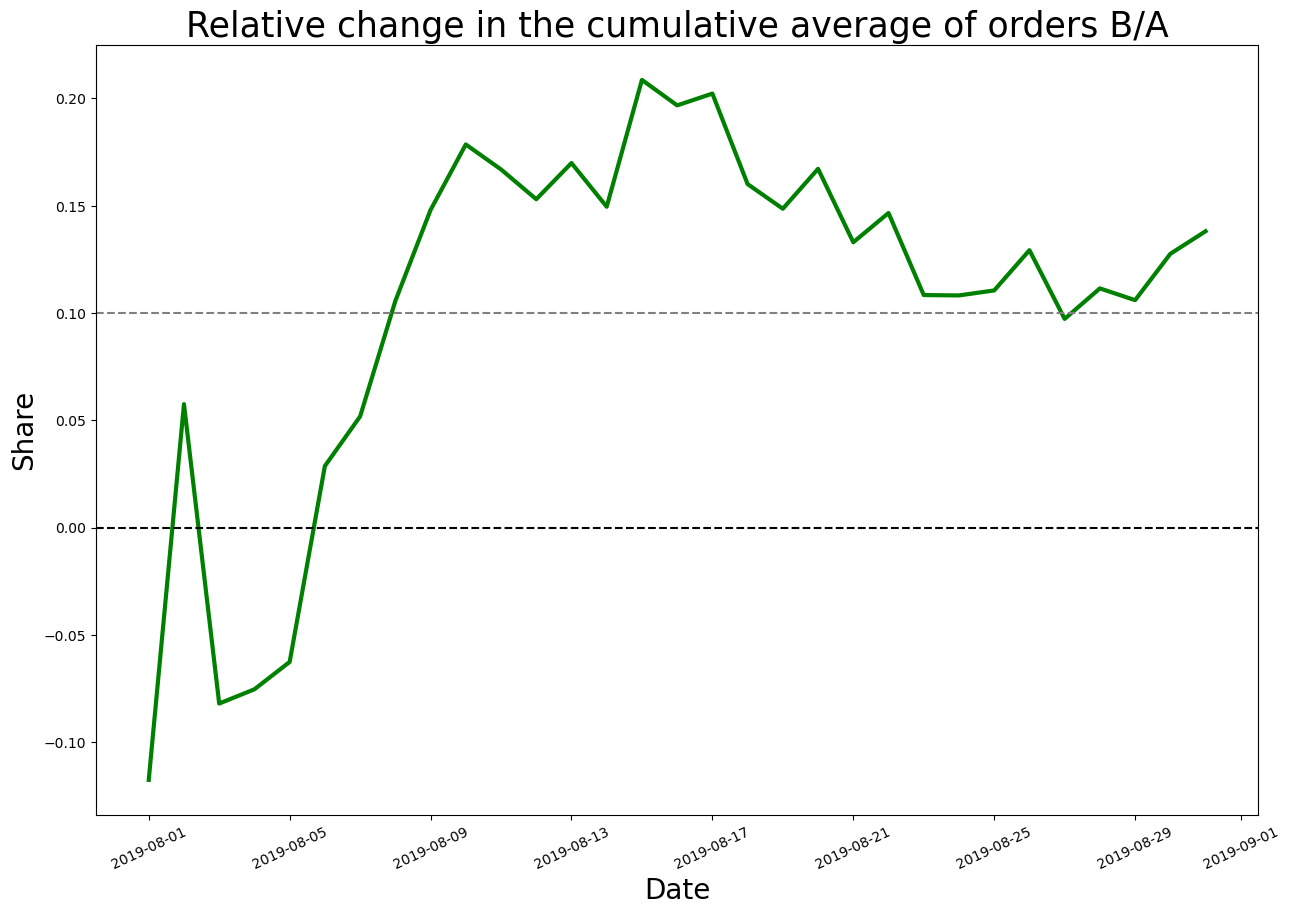

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','ordersAvg']].merge(cumulativeDataB[['date','ordersAvg']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['ordersAvgB']/mergedCumulativeConversions['ordersAvgA']-1, linewidth=3, color='green')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('Relative change in the cumulative average of orders B/A', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Share', fontsize=20)

plt.xticks(rotation=25);

**Summary:**  
We can see that at the beginning of the test there was a struggle between groups A and B. Later, group B managed to get ahead, to lead well, then to relax a little, but to stay above by more than 1%.

### Let's build a scatter plot of the number of orders by user:

#### Let's create a dataframe with orders:

In [32]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.sort_values(by='transactionId', ascending=False).head()

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


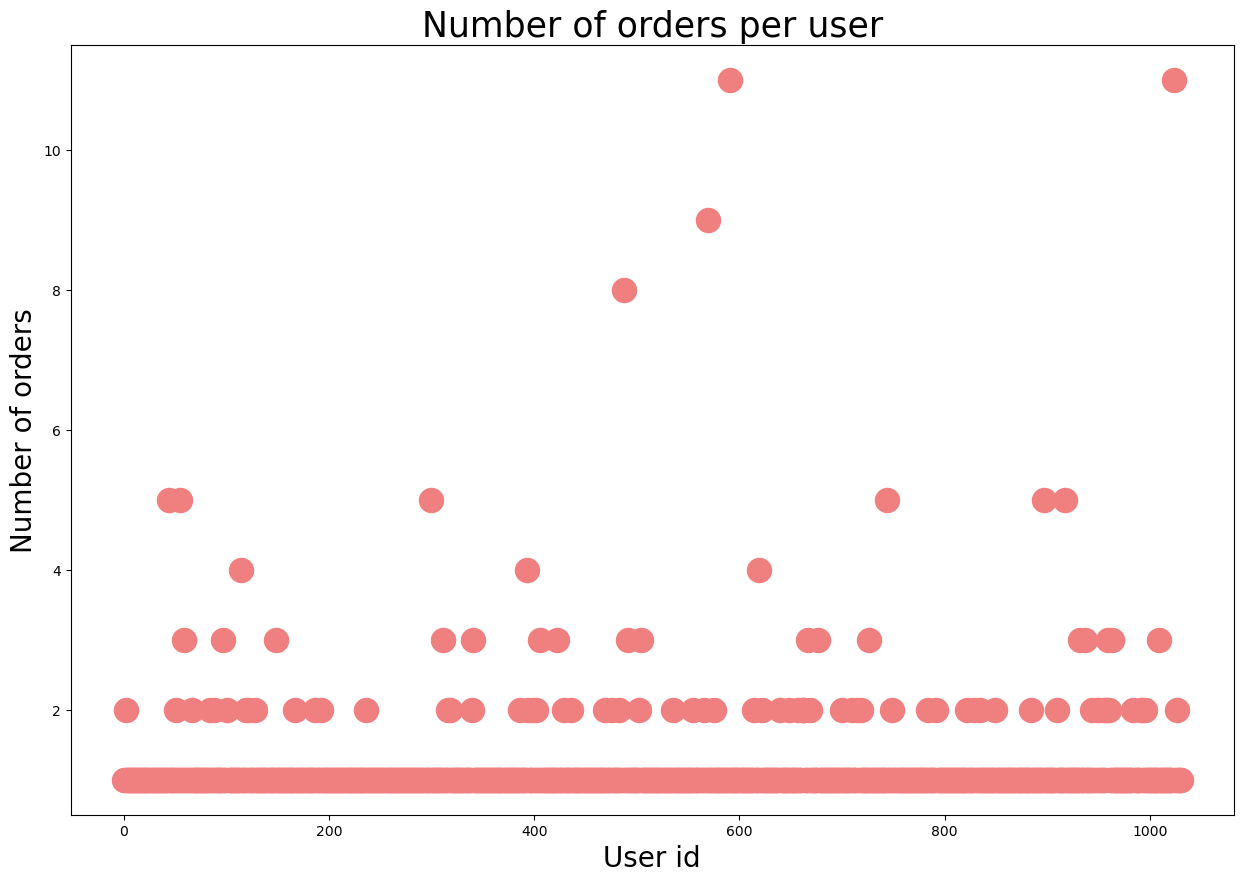

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'], color = 'lightcoral', s=300)
plt.title('Number of orders per user', fontsize=25)
plt.xlabel('User id', fontsize=20)
plt.ylabel('Number of orders', fontsize=20);

**Summary:**  
The graph clearly shows the predominance of users with 1 order, followed by users with 2 orders. And so it gets smaller and smaller. No one made 6-7 orders. We also see isolated cases of 8-11 orders, which is likely to be anomalies for us. A deeper study is needed to understand how many orders are anomalies.

### Let's count the 95th and 99th persentiles of the number of orders per user:

In [34]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

**Summary:**  
No more than 5% have placed more than 2 orders and no more than 1% have placed more than 4 orders. It can be assumed that the indicator of more than 3 orders can be considered as an anomaly and such users can be excluded.

### Let's construct a scatter plot of order costs:

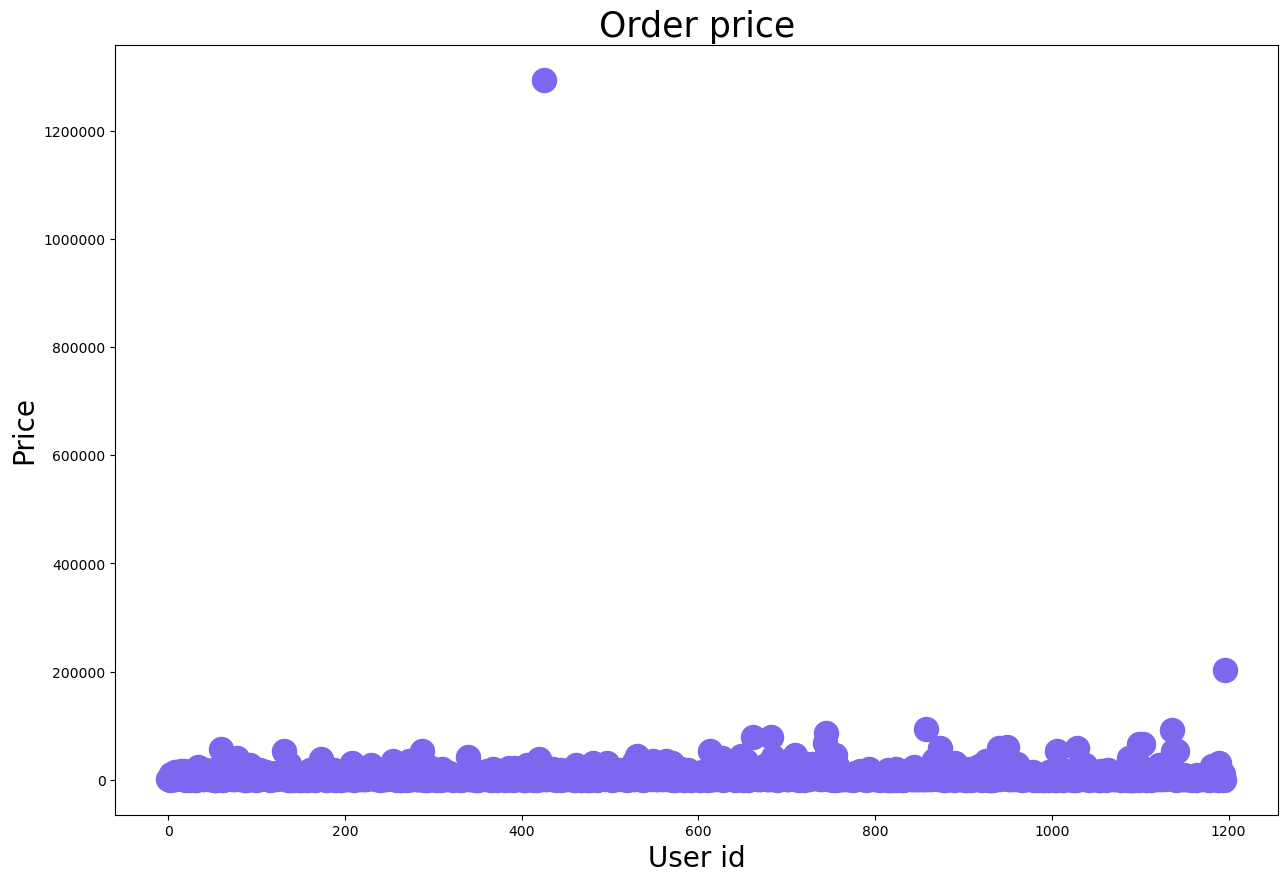

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'mediumslateblue', s=300)
plt.ticklabel_format(style='plain')
plt.title('Order price', fontsize=25)
plt.xlabel('User id', fontsize=20)
plt.ylabel('Price', fontsize=20);

We see a concentration of order values below 100 000 moneys. Let's take a closer look:

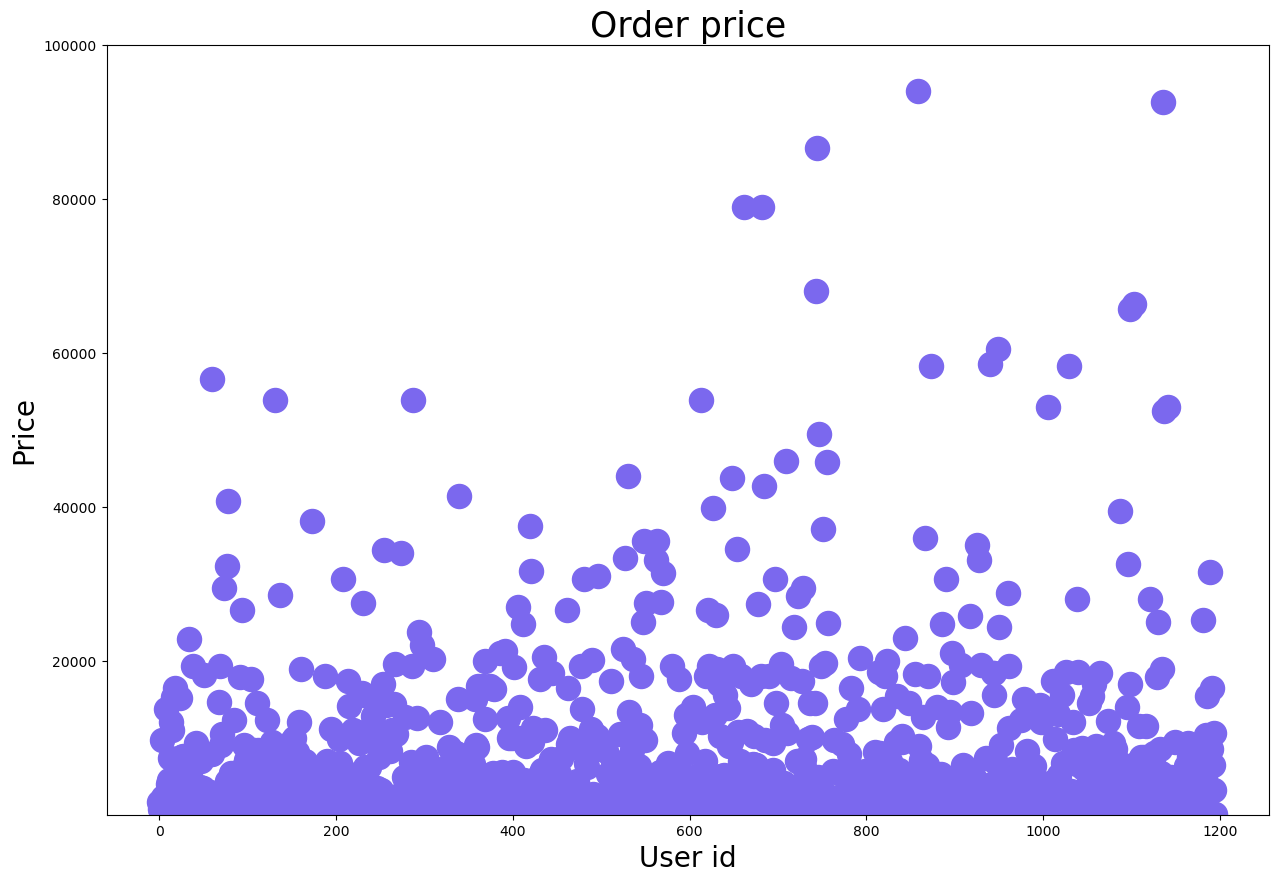

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'mediumslateblue', s=300)
plt.ticklabel_format(style='plain')
plt.title('Order price', fontsize=25)
plt.xlabel('User id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(1, 100000);

And a little bit more detailed:

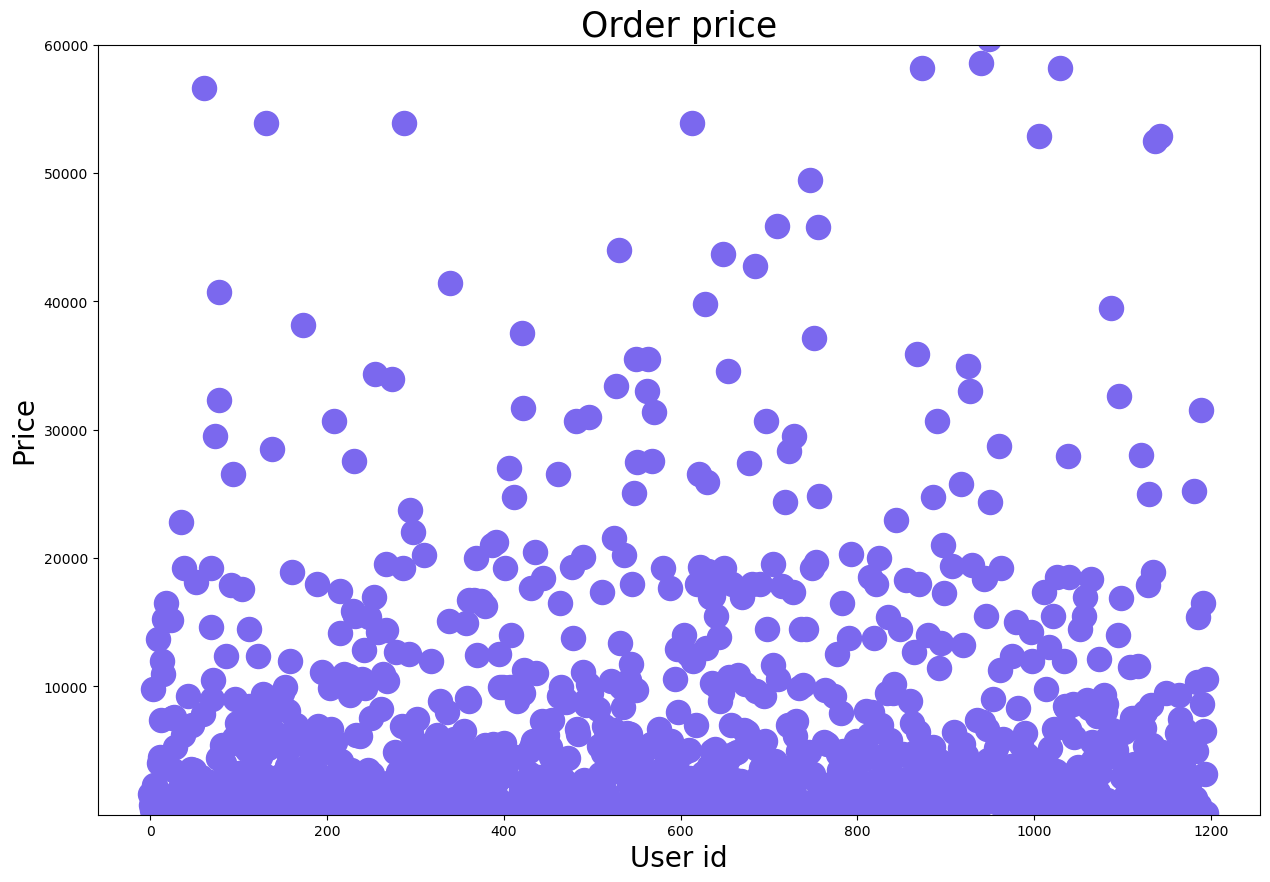

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'mediumslateblue', s=300)
plt.ticklabel_format(style='plain')
plt.title('Order price', fontsize=25)
plt.xlabel('User id', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(1, 60000);

**Summary:**
A huge number of orders have a price below 10 000 moneys. But the concentration up to 20 000 moneys is also large. Let's look at the order value percentiles below to make a final judgement.

### Let's calculate the percentiles of the order price:

In [38]:
np.percentile(orders['revenue'], [95, 99])


array([28000. , 58233.2])

**Summary:**  
No more than 5% of orders are more expensive than 28 000 moneys, no more than 1% are more expensive than 58 234 moneys.  
Knowing that it is common to screen out 1-5% of extreme values, it is recommended to neglect orders priced above 30 000 moneys.

### Let's calculate the statistical significance of differences in the average number of orders per visitor between groups using the raw data:

Let us take as a **null hypothesis** the absence of statistically significant differences in the average number of orders per visitor between the test groups. The **alternative hypothesis** is that there are statistically significant differences in the average number of orders per visitor.

To calculate the metric, we will use the Mann-Whitney test. In the case when there are large (compared to the normal distribution) outliers in the data, we need to use a test based on the structural approach, or nonparametric, just Mann-Whitney.

#### Let's create a dataframe with visitors by day for each group:

In [39]:
# group А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDayA']

# group В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDayB']

#### Create a dataframe with cumulative daily data on the number of users:

In [40]:
# group A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDayA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# group В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDayB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#### Let's collect data on the number of orders and total daily revenue for each group:

In [41]:
# group А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDayA', 'revenuePerDayA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDayA': 'sum', 'revenuePerDayA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# group В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDayB', 'revenuePerDayB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDayB': 'sum', 'revenuePerDayB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


#### Let's merge the data into one dataframe: 

In [42]:
significativity = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
significativity.head()

,date,ordersPerDayA,revenuePerDayA,ordersPerDayB,revenuePerDayB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDayA,visitorsPerDayB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


#### Let's divide the dataframe with orders into dataframes by groups:

In [43]:
# group А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA.sort_values(by='transactionId', ascending=False).head()

,visitorId,transactionId
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


In [44]:
# group В 
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB.sort_values(by='transactionId', ascending=False).head()

,visitorId,transactionId
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4


#### Define variables sampleA and sampleB, in which users from different groups will have the number of orders. Those who have not ordered anything will be set to zeros

In [45]:
# group А
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(significativity['visitorsPerDayA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)
# group В
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(significativity['visitorsPerDayB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0) 

In [46]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница составила {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительная разница составила 0.138


**Summary:**  
From the calculation we see that with raw data p-value is less than the taken statistical significance, so we reject our null hypothesis and conclude that the average number of orders per visitor of the two groups has statistically significant differences.  
The relative gain of group B by the average number of orders is 13.8%.

### Let's calculate the statistical significance of differences in the average order receipt between groups using raw data:

We accept the **null hypothesis** that there are no differences in the average receipt between the groups. The **alternative hypothesis** is that there are differences in the average receipt between the groups.

In [47]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница составила {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительная разница составила 0.259


**Summary:**  
According to the raw data we can see that because of p-value greater than 0.05 there is no statistically significant difference in receipt between the groups, despite the difference in average receipt of 25.9% in favour of group B.  
It is worth pointing out that despite the large relative difference in average receipts, the test shows that there are no statistically significant differences - this is just a clear example of the fact that existing differences can be randomly obtained.

### Let's calculate the statistical significance of differences in the average number of orders per visitor between groups on clean data:

Let's check the anomalies and their number, and perform the calculation of indicators on the anomalous data to assess their impact on the A/B test results.

#### Let's prepare samples of the number of orders by users of different groups:

In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > np.percentile(ordersByUsers['transactionId'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > np.percentile(ordersByUsers['transactionId'], 95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


**We found 74 anomalous cases where orders cost more than 28 000 money and there were more than 2 orders made in a day, which we chose when counting 95% of persentiles.**

Let's calculate the relative loss of users during the filtering process:

In [49]:
percLoss = abnormalUsers.shape[0] / len(ordersGrouped)
print('В относительном выражении вы теряем ' + str(round(percLoss*100, 1)) + '% пользователей.')

В относительном выражении вы теряем 6.2% пользователей.


#### Prepare samples of the number of orders by user by test group:

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                significativity['visitorsPerDayA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                significativity['visitorsPerDayB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#### Let's apply the Mann-Whitney statistical criterion to the received samples:

In [51]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница групп равна {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.013
Относительная разница групп равна 0.173


**Summary:**  
The p-value on the clean data differs from the raw data by 0.04 and is also less than the accepted statistical significance of 0.05. We reject the null hypothesis and assume that the average number of orders of the two groups has statistically significant differences.  
The relative advantage of group B by the average number of orders is 17.3%.

### Let's calculate the statistical significance of differences in average order receipt between groups using the clean data:

In [52]:
print('P-value: ' +
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница составила ' +
    '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value: 0.738
Относительная разница составила -0.020


**Summary:**  
The p-value increased even more and the difference in average receipt went to the side of group A and became equal to 2%. There are still no significant differences in the receipts between the groups.

**General summary:**  
Having analysed the results of the A/B test, we have the following:  
- P-value on average number of orders on raw data did not reach statistical significance - statistically significant differences are present (we reject the null hypothesis). We also know that the benefit on the average number of orders of group B is 13.8%.  
- The P-value of the average cheque on the raw data is strongly greater than 0.05, so there are no stat. significant differences. However, it is worth bearing in mind that the average receipt of group B is larger than the average receipt of group A by 25.9%.
- Taking into account the anomalous data, we can conclude that even the statistical significance on the average number of orders reports the presence of important statistical deviations. In the cleaned data, the average number of orders per visitor of group B is greater than the average number of orders per visitor of group A by 14.8%.
- Anomalies in the average receipt do not report the presence of important statistically significant differences, but in average receipts over 30 000 moneys the advantage is on the side of group A by 2%.

The graph of differences in average order quantity indicates the good data of group B and the continuation of its upward trend.  

The average receipt difference graph showed the dominance of the size of the average receipt by group B, especially if anomalies are not taken into account. The trend goes down towards the end of the test, but still at a good level of 25.9%.  

The decision is to stop the test and admit the victory of group B.  

The marketing department will be given priority hypotheses and advised to implement them, these are the following hypotheses:
- Add a subscription form to all main pages to gather a customer base for email newsletters.
- Add two new channels to attract traffic, which will attract 30% more users.
- Launch a promotion that gives a discount on a product on its birthday.
- Add product recommendation blocks to the website of the online shop to increase conversion rate and average order receipt.
- Show banners with current promotions and sales on the homepage to increase conversion rates.